<a href="https://colab.research.google.com/github/kellyf02/Class-2-Ferris/blob/main/Copy_of_EfficientFrontier_ipynb_Ferris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Harry Markowitz founded the Modern Portfolio Theory (MPT), in which the most fundamental aspect is to **maximize** **returns** while **minimizing risks**.


### MPT means that investors can increase their returns, while minimizing or having no additional risk, by investing in different asset classes instead of just one.

### Having a combination of securities that lack correlation with each other, allows investors to increase or optimize their returns without increasing the risk of their portfolio.

### Encourages **diversification**.

### also known as **mean-variance analysis**.

In [96]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')
import datetime

## The goal is to plot the **Efficient Frontier**:

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the **highest** **expected return **for a given risk level or the **lowest risk** for a given level of expected return.

### Let us start by getting tickers from Wikipedia:

In [97]:
stockInfo = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers_np = stockInfo['Symbol'].to_numpy()

In [98]:
tickers = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN','LLY','SPY']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
Date,,,,,,,
2020-01-02 00:00:00-05:00,122.357437,43.422440,79.273941,71.589775,195.263580,123.702316,300.291595
2020-01-03 00:00:00-05:00,121.303818,43.040665,78.307526,70.910248,194.938385,123.290596,298.017700
2020-01-06 00:00:00-05:00,121.419365,43.313358,78.717796,71.469872,193.665451,123.749054,299.154663
2020-01-07 00:00:00-05:00,120.929955,43.022491,78.280174,71.062141,189.484177,123.983009,298.313507
2020-01-08 00:00:00-05:00,122.785690,42.958847,78.599274,71.565796,189.855896,125.105782,299.903320
...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,128.346893,68.213684,113.713264,176.723465,358.769989,794.910034,592.906433
2024-12-24 00:00:00-05:00,129.720123,68.542015,114.160919,178.318420,361.630005,794.301025,599.496582
2024-12-26 00:00:00-05:00,130.536087,68.542015,114.668251,177.525894,360.429993,792.773682,599.536499


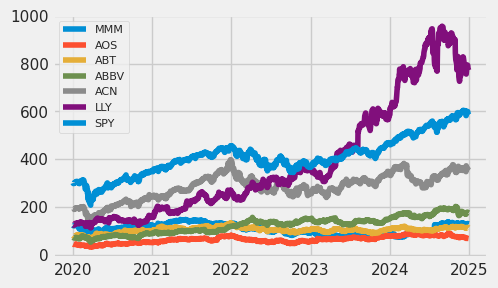

In [99]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

### Log returns of the 7 assets:

In [100]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
Date,,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.008648,-0.008831,-0.012266,-0.009537,-0.001667,-0.003334,-0.007601
2020-01-06 00:00:00-05:00,0.000952,0.006316,0.005226,0.007861,-0.006551,0.003712,0.003808
2020-01-07 00:00:00-05:00,-0.004039,-0.006738,-0.005575,-0.005721,-0.021827,0.001889,-0.002816
2020-01-08 00:00:00-05:00,0.015229,-0.001480,0.004068,0.007063,0.001960,0.009015,0.005315


## Now, create annualized covariance and correlation matrices.

### Covariance measures the **directional relationship** between the returns on two assets.

In [101]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
MMM,0.084735,0.044532,0.029603,0.022298,0.039521,0.019445,0.034763
AOS,0.044532,0.090048,0.027495,0.019606,0.041046,0.020330,0.036544
ABT,0.029603,0.027495,0.067746,0.028886,0.039750,0.030728,0.033485
ABBV,0.022298,0.019606,0.028886,0.061874,0.026031,0.031755,0.024058
ACN,0.039521,0.041046,0.039750,0.026031,0.085552,0.029804,0.047499
LLY,0.019445,0.020330,0.030728,0.031755,0.029804,0.102445,0.028939
SPY,0.034763,0.036544,0.033485,0.024058,0.047499,0.028939,0.044097


### Correlation measures the **degree** to which two securities move in relation to each other.

In [102]:
corr_matrix =data.corr() * 250
corr_matrix

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
MMM,250.000000,127.451115,97.678354,76.986491,116.045007,52.175992,142.174894
AOS,127.451115,250.000000,88.006928,65.666511,116.912897,52.917250,144.982545
ABT,97.678354,88.006928,250.000000,111.538710,130.531431,92.210867,153.158734
ABBV,76.986491,65.666511,111.538710,250.000000,89.446061,99.711716,115.146283
ACN,116.045007,116.912897,130.531431,89.446061,250.000000,79.588154,193.334610
LLY,52.175992,52.917250,92.210867,99.711716,79.588154,250.000000,107.640161
SPY,142.174894,144.982545,153.158734,115.146283,193.334610,107.640161,250.000000


In [103]:
portfolio1 = data[['MMM','LLY']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,MMM,LLY
MMM,0.084735,0.019445
LLY,0.019445,0.102445


## Let us assign weights to each investment in the portfolio randomly, and find the variance of this portfolio.

In [104]:
w = {'MMM': 0.1, 'LLY': 0.2, 'AOS': 0.2, 'ABT': 0.1, 'ABBV': 0.2, 'ACN': 0.05, 'SPY': 0.15}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.037030926741343194)

### To optimize the portfolio, we **cannot assign the weights**. We need exact weights that will maximize expected return for a given risk.

### So, let us get the yearly returns for each company using the package resample.

In [105]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-105-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
MMM,0.045164
AOS,0.144306
ABT,0.041581
ABBV,0.185137
ACN,0.153931
LLY,0.487153
SPY,0.155179


### Now, the portfolio returns: individual returns multiplied by weights in the portfolio.

In [106]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(0.13862813704464821)

## Calculate the volatility, or the annualized standard deviation.

In [107]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
MMM,0.291209
AOS,0.300199
ABT,0.260385
ABBV,0.248844
ACN,0.292609
LLY,0.320197
SPY,0.210075


In [108]:
data.std()*np.sqrt(250)

,0
MMM,0.291093
AOS,0.300080
ABT,0.260281
ABBV,0.248745
ACN,0.292493
LLY,0.320070
SPY,0.209992


## Create a table for returns and volatility of assets.

In [109]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
MMM,0.045164,0.291209
AOS,0.144306,0.300199
ABT,0.041581,0.260385
ABBV,0.185137,0.248844
ACN,0.153931,0.292609
LLY,0.487153,0.320197
SPY,0.155179,0.210075


In [110]:
p_ret = []
p_vol = []
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [111]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [112]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [113]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,MMM weight,AOS weight,ABT weight,ABBV weight,ACN weight,LLY weight,SPY weight
0,0.203338,3.208945,0.296779,0.018806,0.071509,0.009105,0.005858,0.267706,0.330238
1,0.118244,3.443605,0.275651,0.142505,0.132143,0.037351,0.338851,0.027879,0.045619
2,0.152873,3.039888,0.067143,0.133024,0.119216,0.251468,0.144852,0.038309,0.245988
3,0.163328,3.187460,0.040153,0.195081,0.181943,0.063274,0.204589,0.101561,0.213400
4,0.168170,3.043408,0.172760,0.191390,0.186945,0.167199,0.012676,0.151583,0.117448


<Axes: xlabel='Volatility', ylabel='Returns'>

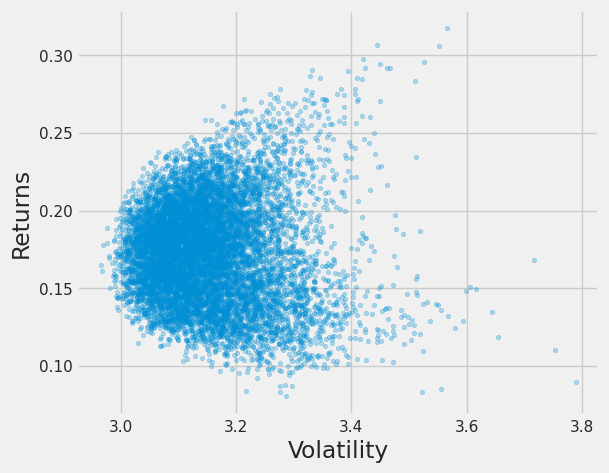

In [114]:

portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])

In [115]:
stockInfo = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers_np = stockInfo['Symbol'].to_numpy()

In [116]:
tickers = ['DAL', 'CVS', 'CLX', 'HAS', 'LHX','NKE','PAYX']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2010-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,DAL,CVS,CLX,HAS,LHX,NKE,PAYX
Date,,,,,,,
2010-01-04 00:00:00-05:00,9.788015,23.180779,39.339462,19.994753,34.564999,13.509630,18.580446
2010-01-05 00:00:00-05:00,10.555702,23.089403,39.768524,19.773539,34.328999,13.563379,18.568384
2010-01-06 00:00:00-05:00,10.564426,22.885574,39.666058,19.755102,34.679443,13.480694,18.719109
2010-01-07 00:00:00-05:00,11.070403,23.729017,39.288235,19.472458,34.779560,13.612997,19.014517
2010-01-08 00:00:00-05:00,10.878481,23.897715,39.294643,19.521608,34.822468,13.586119,19.026567
...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,61.370438,43.586063,161.842545,56.169556,211.868546,76.373451,138.429703
2024-12-24 00:00:00-05:00,62.407913,43.694683,162.179932,56.535580,212.156967,76.403297,140.466309
2024-12-26 00:00:00-05:00,62.248302,44.356274,162.715820,56.387192,212.425476,76.552544,141.708145


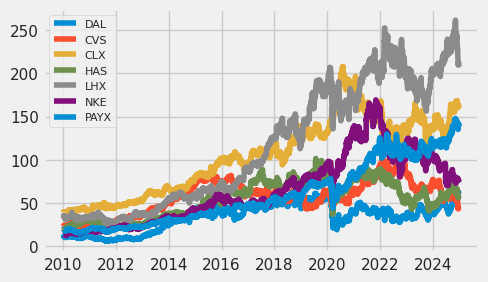

In [117]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [118]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,DAL,CVS,CLX,HAS,LHX,NKE,PAYX
Date,,,,,,,
2010-01-04 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05 00:00:00-05:00,0.075507,-0.003950,0.010848,-0.011125,-0.006851,0.003971,-0.000649
2010-01-06 00:00:00-05:00,0.000826,-0.008867,-0.002580,-0.000933,0.010157,-0.006115,0.008084
2010-01-07 00:00:00-05:00,0.046783,0.036192,-0.009571,-0.014411,0.002883,0.009766,0.015658
2010-01-08 00:00:00-05:00,-0.017489,0.007084,0.000163,0.002521,0.001233,-0.001976,0.000634


In [119]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,DAL,CVS,CLX,HAS,LHX,NKE,PAYX
DAL,0.162316,0.029775,0.007108,0.041266,0.032134,0.041527,0.037412
CVS,0.029775,0.062951,0.012054,0.020755,0.023016,0.019803,0.023505
CLX,0.007108,0.012054,0.043935,0.010458,0.010410,0.012704,0.011954
HAS,0.041266,0.020755,0.010458,0.089137,0.024857,0.033658,0.030124
LHX,0.032134,0.023016,0.010410,0.024857,0.063116,0.023890,0.027372
NKE,0.041527,0.019803,0.012704,0.033658,0.023890,0.077438,0.029876
PAYX,0.037412,0.023505,0.011954,0.030124,0.027372,0.029876,0.049394


In [120]:
corr_matrix =data.corr() * 250
corr_matrix

,DAL,CVS,CLX,HAS,LHX,NKE,PAYX
DAL,250.000000,73.639966,21.042058,85.766667,79.369764,92.600139,104.456957
CVS,73.639966,250.000000,57.300125,69.268042,91.284134,70.907697,105.381934
CLX,21.042058,57.300125,250.000000,41.780757,49.423068,54.450436,64.154367
HAS,85.766667,69.268042,41.780757,250.000000,82.850403,101.281254,113.497767
LHX,79.369764,91.284134,49.423068,82.850403,250.000000,85.428631,122.556533
NKE,92.600139,70.907697,54.450436,101.281254,85.428631,250.000000,120.767439
PAYX,104.456957,105.381934,64.154367,113.497767,122.556533,120.767439,250.000000


In [121]:
portfolio1 = data[['DAL','CVS']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,DAL,CVS
DAL,0.162316,0.029775
CVS,0.029775,0.062951


In [122]:
w = {'DAL': 0.1, 'CVS': 0.2, 'CLX': 0.2, 'HAS': 0.1, 'LHX': 0.2, 'NKE': 0.05, 'PAYX': 0.15}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.028210577602223307)

In [123]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-123-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
DAL,0.200579
CVS,0.073754
CLX,0.110884
HAS,0.074722
LHX,0.158583
NKE,0.137359
PAYX,0.163405


In [124]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(0.12755302716479378)

In [125]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
DAL,0.402939
CVS,0.250933
CLX,0.209634
HAS,0.298597
LHX,0.251261
NKE,0.278313
PAYX,0.222276


In [126]:
data.std()*np.sqrt(250)

,0
DAL,0.402885
CVS,0.250900
CLX,0.209606
HAS,0.298557
LHX,0.251228
NKE,0.278277
PAYX,0.222247


In [127]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
DAL,0.200579,0.402939
CVS,0.073754,0.250933
CLX,0.110884,0.209634
HAS,0.074722,0.298597
LHX,0.158583,0.251261
NKE,0.137359,0.278313
PAYX,0.163405,0.222276


In [128]:
p_ret = []
p_vol = []
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [129]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [130]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [131]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,DAL weight,CVS weight,CLX weight,HAS weight,LHX weight,NKE weight,PAYX weight
0,0.131752,3.092804,0.173763,0.361439,0.017665,0.018913,0.259032,0.071235,0.097953
1,0.120335,2.747773,0.081074,0.260096,0.122305,0.154763,0.174347,0.068237,0.139178
2,0.122254,3.025741,0.054270,0.129024,0.042832,0.240582,0.082722,0.292443,0.158127
3,0.139105,3.183744,0.220514,0.167587,0.045751,0.109123,0.004457,0.206217,0.246350
4,0.120719,3.214636,0.202583,0.284206,0.009666,0.256835,0.162766,0.025640,0.058304


<Axes: xlabel='Volatility', ylabel='Returns'>

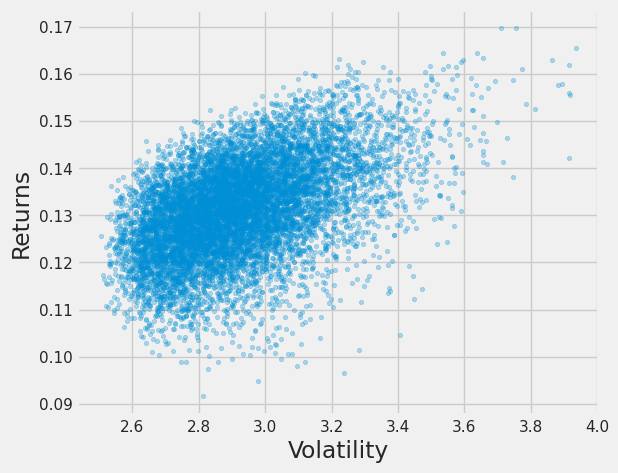

In [132]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])